# 3. Polynomial Regression

## 공부시간에 따른 시험점수(우등생)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("PolynomialRegressionData.csv")
X= dataset.iloc[:,:-1].values
y=dataset.iloc[:, -1].values

### 3-1 단순 선형회귀( simple linear regression)

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y) #전체 데이터로 학습

LinearRegression()

### 데이터 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

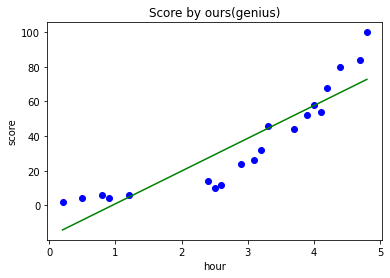

In [4]:
plt.scatter(X,y,color='blue') #산점도
plt.plot(X, reg.predict(X), color='green')#선그래프
plt.title('Score by ours(genius)')
plt.xlabel('hour')
plt.ylabel('score')
plt.show

In [5]:
reg.score(X,y) #전체 데이터를 통한 모델평가

0.8169296513411765

## 3-2 다항회귀(Polynomial Regression)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) #2차 다항식으로 변환시키기
X_poly = poly_reg.fit_transform(X)
X_poly[:5] 

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

###### x^0, x^1, X^2

In [7]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [8]:

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y) #변환된 x와 y를 가지고 모델 생성

LinearRegression()

### 데이터 시각화(변환된x 와 y )

<function matplotlib.pyplot.show(close=None, block=None)>

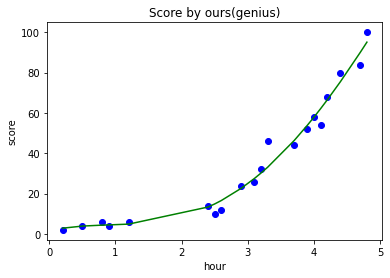

In [9]:
plt.scatter(X,y,color='blue')
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)),color='green')
plt.title('Score by ours(genius)')
plt.xlabel('hour')
plt.ylabel('score')
plt.show

In [10]:
X_range = np.arange(min(X),max(X),0.1) #X의 최소값~ 최대값까지의 범위를 0.1단위로 잘라서 데이ㅓ생성 
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [11]:
X_range.shape

(46,)

In [12]:
X[:5]
X.shape

(20, 1)

In [13]:
X_range = X_range.reshape(-1, 1) #row 개수는 자동계싼, column 개수는 1개
X_range.shape

(46, 1)

In [14]:
X_range[:5] #이런식으로 칼럼이 하나 생겼다는 것을알 수 있음 -> X랑 형태맞춰준거임 

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

<function matplotlib.pyplot.show(close=None, block=None)>

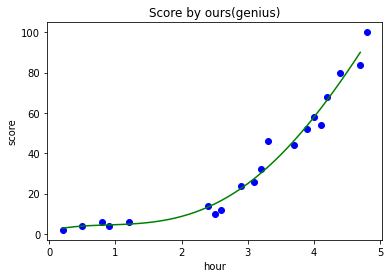

In [16]:
plt.scatter(X,y,color='blue')
plt.plot(X_range,lin_reg.predict(poly_reg.fit_transform(X_range)),color='green')
plt.title('Score by ours(genius)')
plt.xlabel('hour')
plt.ylabel('score')
plt.show

### 공부시간에따른 시험성적 예측 

In [17]:
reg.predict([[2]]) #2시간 공부했을때 선형회귀모델의 예측값 

array([19.85348988])

In [18]:
lin_reg.predict(poly_reg.fit_transform([[2]]))

array([8.70559135])